In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_excel("loan.xlsx")
dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000
1,28,Female,Master's,Data Analyst,3,65000
2,45,Male,PhD,Senior Manager,15,150000
3,36,Female,Bachelor's,Sales Associate,7,60000
4,52,Male,Master's,Director,20,200000


In [4]:
dataset.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_9532\1234999535.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Years of Experience"])


<Axes: xlabel='Years of Experience', ylabel='Density'>

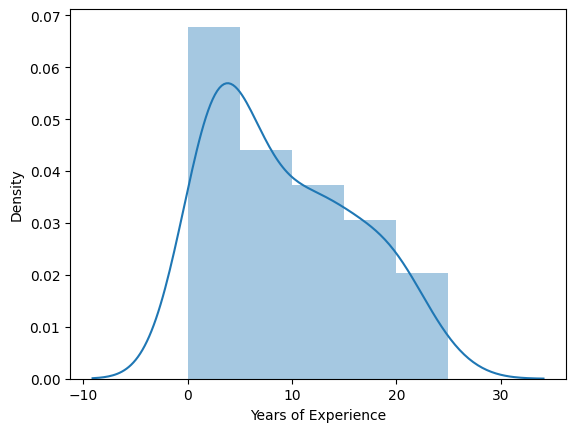

In [10]:
sns.distplot(dataset["Years of Experience"])

In [6]:
q1 = dataset["Years of Experience"].quantile(0.25)
q3 = dataset["Years of Experience"].quantile(0.75)
iqr = q3 - q1

In [7]:
min_r= q1-(1.5*iqr)
max_r=q3+(1.5*iqr)
min_r, max_r

(-14.25, 31.75)

In [9]:
dataset=dataset[dataset["Years of Experience"] <= max_r]

In [11]:
from sklearn.preprocessing import FunctionTransformer 

In [14]:
ft =FunctionTransformer(func=np.log1p)

In [15]:
ft.fit(dataset[["Years of Experience"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [16]:
dataset["Years of Experience_tf"]=ft.transform(dataset[["Years of Experience"]])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9532\1703481485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Years of Experience"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_9532\1703481485.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Years of Experience"])


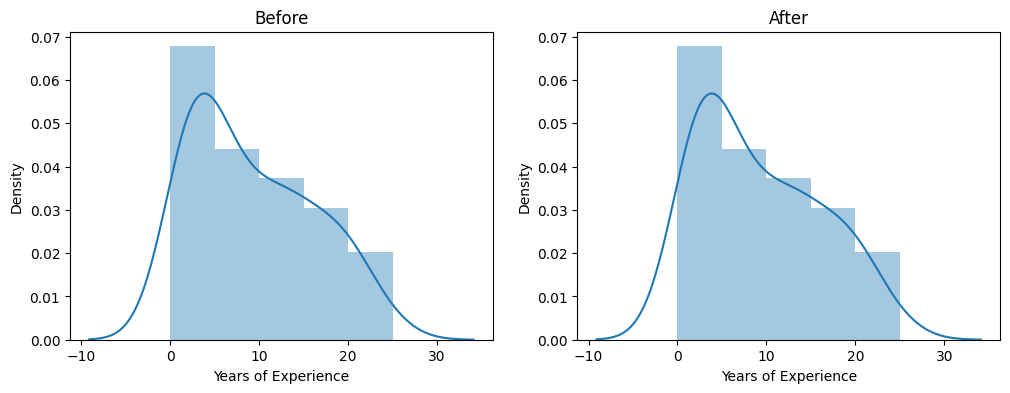

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(dataset["Years of Experience"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(dataset["Years of Experience"])
plt.title("After")

plt.show()